# 🧩 10.2 — Preprocesado de datos para Machine Learning

En este notebook aprenderás a transformar texto en **vectores numéricos**, el paso fundamental antes de aplicar algoritmos de Machine Learning.

Usaremos dos técnicas comunes:

- 🧱 **Bag of Words (CountVectorizer)**: cuenta ocurrencias de cada palabra.
- 🔢 **TF-IDF (TfidfVectorizer)**: pondera las palabras según su frecuencia e importancia.

📘 *Objetivo:* aprender a pasar de texto crudo → matrices numéricas para usar con modelos supervisados.

In [3]:
# 🚀 Instalación y librerías
try:
    import nltk
    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
except ImportError:
    import sys
    !{sys.executable} -m pip install nltk scikit-learn
    import nltk
    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

print('✅ Librerías preparadas.')


✅ Librerías preparadas.


---
## 1️⃣ Definición del corpus de ejemplo

Comenzamos con un pequeño conjunto de frases. Cada frase representa un documento dentro del corpus.

In [4]:
corpus = [
    'Me encanta aprender Python para análisis de datos',
    'Python y Machine Learning son herramientas poderosas',
    'Los datos son el nuevo petróleo del siglo XXI',
    'El aprendizaje automático permite predecir patrones',
    'Aprender ciencia de datos abre muchas oportunidades'
]

for i, doc in enumerate(corpus):
    print(f"{i+1}. {doc}")

1. Me encanta aprender Python para análisis de datos
2. Python y Machine Learning son herramientas poderosas
3. Los datos son el nuevo petróleo del siglo XXI
4. El aprendizaje automático permite predecir patrones
5. Aprender ciencia de datos abre muchas oportunidades


---
## 2️⃣ Bag of Words (CountVectorizer)

Esta técnica crea una **matriz de conteos**: cada fila representa un documento y cada columna una palabra del vocabulario.

In [5]:
vectorizer = CountVectorizer(stop_words=stopwords.words('spanish'))
X = vectorizer.fit_transform(corpus)

print('🔤 Vocabulario:', vectorizer.get_feature_names_out())
print('\n📊 Matriz de conteos:')
print(X.toarray())

🔤 Vocabulario: ['abre' 'análisis' 'aprender' 'aprendizaje' 'automático' 'ciencia' 'datos'
 'encanta' 'herramientas' 'learning' 'machine' 'muchas' 'nuevo'
 'oportunidades' 'patrones' 'permite' 'petróleo' 'poderosas' 'predecir'
 'python' 'siglo' 'xxi']

📊 Matriz de conteos:
[[0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0]
 [1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]]


Podemos convertir esta matriz en un `DataFrame` de Pandas para interpretarla mejor.

In [6]:
import pandas as pd

df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_bow

,abre,análisis,aprender,aprendizaje,automático,ciencia,datos,encanta,herramientas,learning,...,nuevo,oportunidades,patrones,permite,petróleo,poderosas,predecir,python,siglo,xxi
0,0,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,1
3,0,0,0,1,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4,1,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


---
## 3️⃣ 🧩 Ejercicio — Normalización del texto

Antes de vectorizar, deberíamos limpiar el texto:
- Pasarlo a minúsculas
- Eliminar caracteres especiales
- Quitar stopwords

👉 **Tarea:** crea una función `limpiar_texto(texto)` que realice estos pasos usando `nltk` y devuelva el texto limpio.

�� *Tip:* puedes reutilizar la lógica del notebook 10.1

In [7]:
# ✏️ Tu código aquí...

### ✅ Solución propuesta

In [8]:
from nltk.tokenize import word_tokenize
import re

def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-záéíóúüñ\s]', '', texto)
    tokens = word_tokenize(texto)
    stop_words = set(stopwords.words('spanish'))
    tokens_filtrados = [t for t in tokens if t not in stop_words]
    return ' '.join(tokens_filtrados)

# Probar la limpieza
print(limpiar_texto('El Aprendizaje Automático es fascinante!!!'))

aprendizaje automático fascinante


---
## 4️⃣ TF-IDF (Term Frequency - Inverse Document Frequency)

TF-IDF mide la **relevancia** de una palabra en un documento respecto al conjunto total. Palabras muy frecuentes en todos los textos tienen menor peso.

In [9]:
tfidf = TfidfVectorizer(stop_words=stopwords.words('spanish'))
X_tfidf = tfidf.fit_transform(corpus)

df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
df_tfidf.head()

,abre,análisis,aprender,aprendizaje,automático,ciencia,datos,encanta,herramientas,learning,...,nuevo,oportunidades,patrones,permite,petróleo,poderosas,predecir,python,siglo,xxi
0,0.000000,0.516374,0.416607,0.000000,0.000000,0.000000,0.345822,0.516374,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.416607,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.463693,0.463693,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.463693,0.000000,0.374105,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.317527,0.000000,0.000000,0.000000,...,0.474125,0.000000,0.000000,0.000000,0.474125,0.000000,0.000000,0.000000,0.474125,0.474125
3,0.000000,0.000000,0.000000,0.447214,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.447214,0.447214,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000
4,0.442832,0.000000,0.357274,0.000000,0.000000,0.442832,0.296570,0.000000,0.000000,0.000000,...,0.000000,0.442832,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


---
## 5️⃣ Comparativa visual entre BoW y TF-IDF

Podemos observar cómo TF-IDF suaviza los valores y elimina el sesgo de palabras muy comunes.

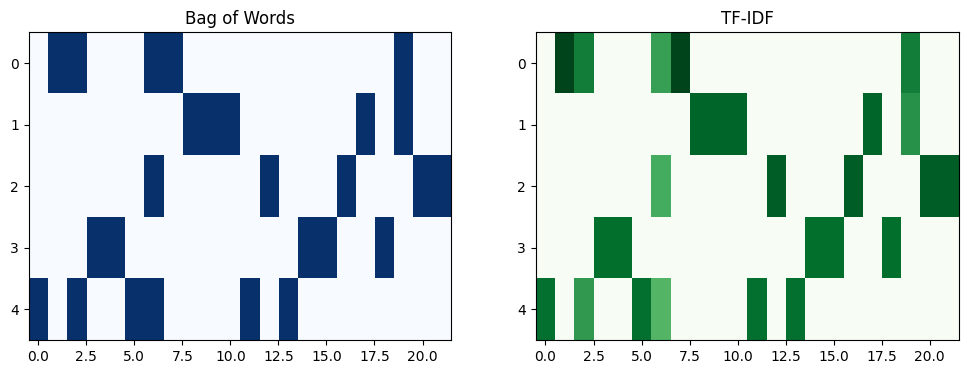

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].imshow(df_bow, aspect='auto', cmap='Blues')
ax[0].set_title('Bag of Words')

ax[1].imshow(df_tfidf, aspect='auto', cmap='Greens')
ax[1].set_title('TF-IDF')

plt.show()

---
## 6️⃣ 🧩 Ejercicio — Aplicar preprocesado completo

Usa `limpiar_texto()` para normalizar el corpus y vuelve a generar la matriz TF-IDF.

👉 *Objetivo:* observar cómo cambia el vocabulario después de limpiar el texto.

In [11]:
# ✏️ Tu código aquí...

### ✅ Solución propuesta

In [12]:
corpus_limpio = [limpiar_texto(doc) for doc in corpus]
X_tfidf_limpio = tfidf.fit_transform(corpus_limpio)
df_tfidf_limpio = pd.DataFrame(X_tfidf_limpio.toarray(), columns=tfidf.get_feature_names_out())
df_tfidf_limpio.head()

,abre,análisis,aprender,aprendizaje,automático,ciencia,datos,encanta,herramientas,learning,...,nuevo,oportunidades,patrones,permite,petróleo,poderosas,predecir,python,siglo,xxi
0,0.000000,0.516374,0.416607,0.000000,0.000000,0.000000,0.345822,0.516374,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.416607,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.463693,0.463693,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.463693,0.000000,0.374105,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.317527,0.000000,0.000000,0.000000,...,0.474125,0.000000,0.000000,0.000000,0.474125,0.000000,0.000000,0.000000,0.474125,0.474125
3,0.000000,0.000000,0.000000,0.447214,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.447214,0.447214,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000
4,0.442832,0.000000,0.357274,0.000000,0.000000,0.442832,0.296570,0.000000,0.000000,0.000000,...,0.000000,0.442832,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


---
## 🧠 Conclusiones

- **CountVectorizer (BoW)** representa frecuencias brutas de palabras.
- **TfidfVectorizer** ajusta esas frecuencias según su relevancia global.
- Preprocesar y limpiar los textos mejora significativamente la calidad del modelo.

💡 Próximo paso → **10.3 — Modelos de clasificación con Scikit-learn (Naive Bayes / Regresión logística)**.